In [41]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Log

The log is filtered and projected using ProM

In [3]:
event_log = pm4py.read_xes('/Users/liliiaaliakberova/Desktop/Study/TUe_3_semester/Advanced_PM/end_A_event_log.xes')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██| 17549/17549 [00:05<00:00, 2974.41it/s]


# Distribution of End Activities

In [4]:
end_activities_distribution = pm4py.get_end_activities(event_log)
end_activities_distribution

{'A_Pending': 11804, 'A_Cancelled': 3382, 'A_Denied': 2363}

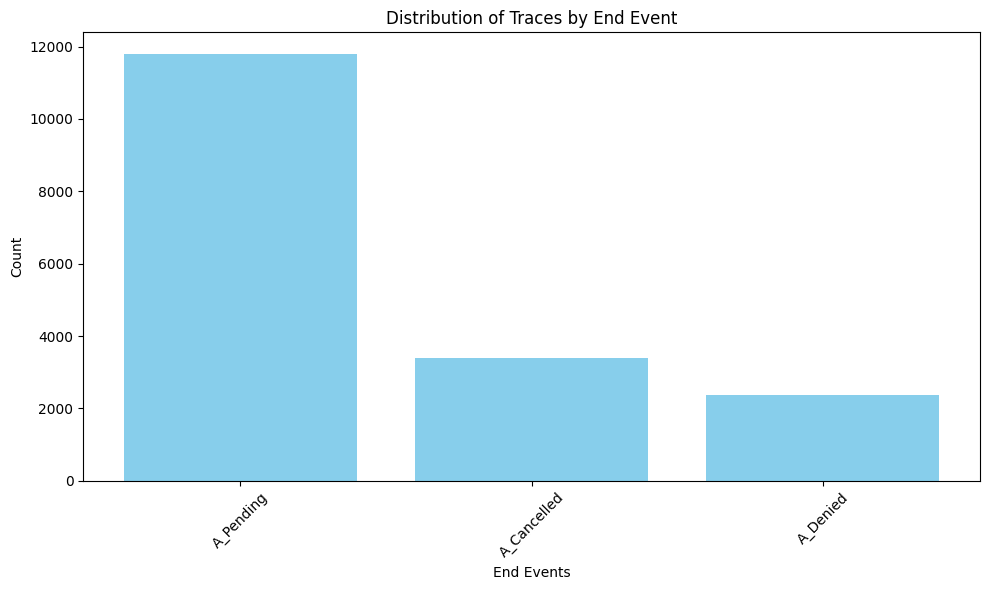

In [5]:
#visualisation of the previous
activities = list(end_activities_distribution.keys())
counts = [end_activities_distribution[activity] for activity in activities]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(activities, counts, color='skyblue')
plt.xlabel('End Events')
plt.ylabel('Count')
plt.title('Distribution of Traces by End Event')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

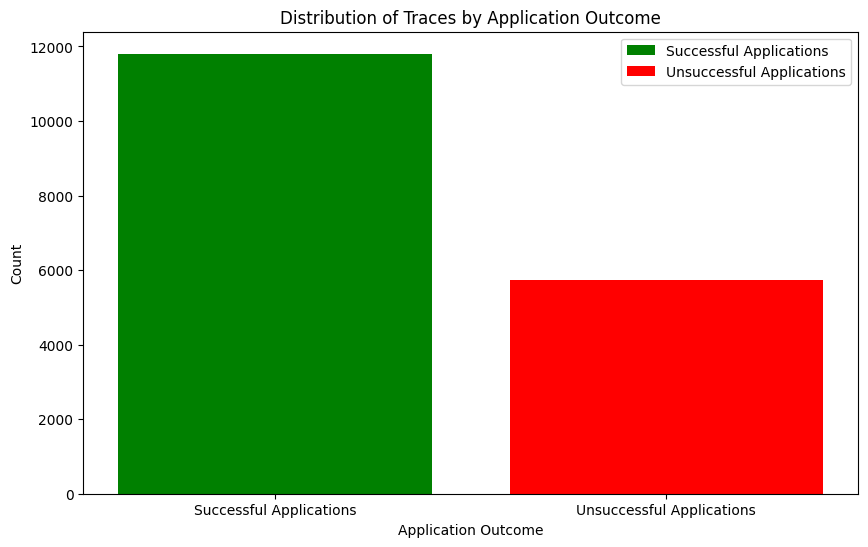

In [43]:
# Separate 'A_Pending' and other activities
successful_counts = [end_activities_distribution.get('A_Pending', 0)]
unsuccessful_counts = [count for activity, count in end_activities_distribution.items() if activity != 'A_Pending']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar for successful applications with 'A_Pending'
ax.bar('Successful Applications', successful_counts, color='green', label='Successful Applications')

# Bar for unsuccessful applications with other activities
ax.bar('Unsuccessful Applications', sum(unsuccessful_counts), color='red', label='Unsuccessful Applications')

ax.set_xlabel('Application Outcome')
ax.set_ylabel('Count')
ax.set_title('Distribution of Traces by Application Outcome')
ax.legend()

# Display the plot
plt.show()

# Insigths about traces

In [6]:
# List of all start activities
pm4py.get_start_activities(event_log)

{'A_Create Application': 17549}

In [7]:
# number of distinct trace variants
len(pm4py.get_variants_as_tuples(event_log))

28

In [8]:
# transform the log into a dataframe
df = pm4py.convert_to_dataframe(event_log)
df.head(5)

,Action,EventID,EventOrigin,org:resource,concept:name,lifecycle:transition,time:timestamp,case:LoanGoal,case:concept:name,case:RequestedAmount,case:ApplicationType
0,Created,Application_652823628,Application,User_1,A_Create Application,complete,2016-01-01 10:51:15.304000+01:00,Existing loan takeover,Application_652823628,20000.0,New credit
1,statechange,ApplState_1582051990,Application,User_1,A_Submitted,complete,2016-01-01 10:51:15.352000+01:00,Existing loan takeover,Application_652823628,20000.0,New credit
2,statechange,ApplState_642383566,Application,User_1,A_Concept,complete,2016-01-01 10:52:36.413000+01:00,Existing loan takeover,Application_652823628,20000.0,New credit
3,statechange,ApplState_99568828,Application,User_52,A_Accepted,complete,2016-01-02 12:23:04.299000+01:00,Existing loan takeover,Application_652823628,20000.0,New credit
4,statechange,ApplState_946455804,Application,User_52,A_Complete,complete,2016-01-02 12:30:28.633000+01:00,Existing loan takeover,Application_652823628,20000.0,New credit


In [9]:
from pm4py.objects.log.util.log import project_traces
def print_nth(log, index):
    print(str(project_traces(event_log)[index]))

In [10]:
#print the first trace
print_nth(event_log, 0)

['A_Create Application', 'A_Submitted', 'A_Concept', 'A_Accepted', 'A_Complete', 'A_Validating', 'A_Incomplete', 'A_Validating', 'A_Pending']


In [11]:
#print the second trace
print_nth(event_log, 1)

['A_Create Application', 'A_Submitted', 'A_Concept', 'A_Accepted', 'A_Complete', 'A_Cancelled']


# Model Visualization

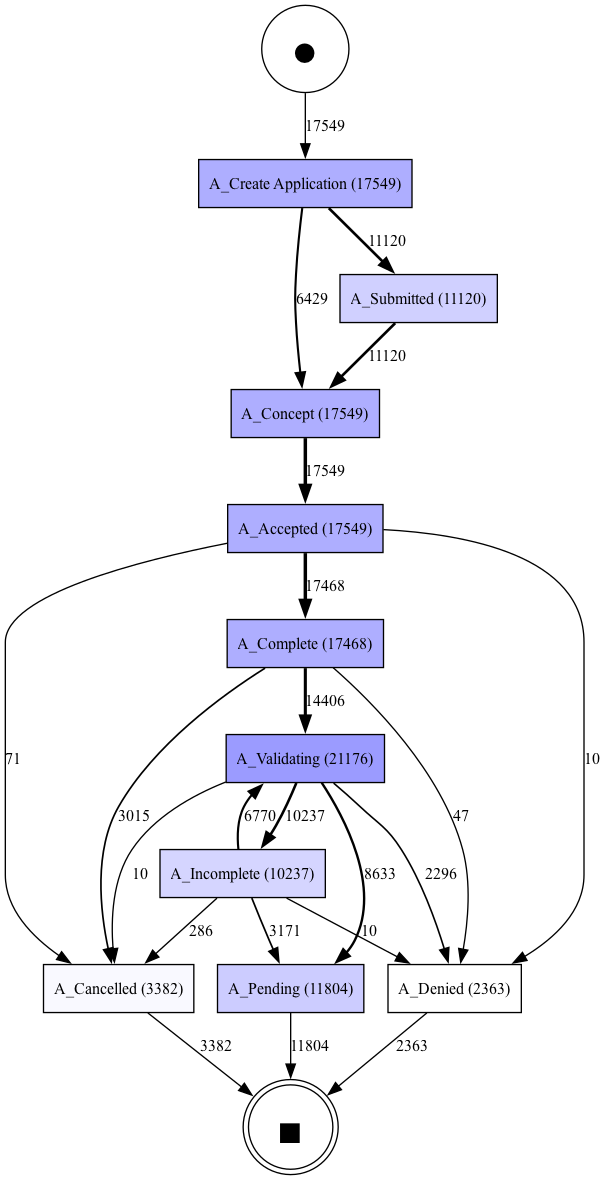

In [12]:
#Visualisation of DFG for the event log
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

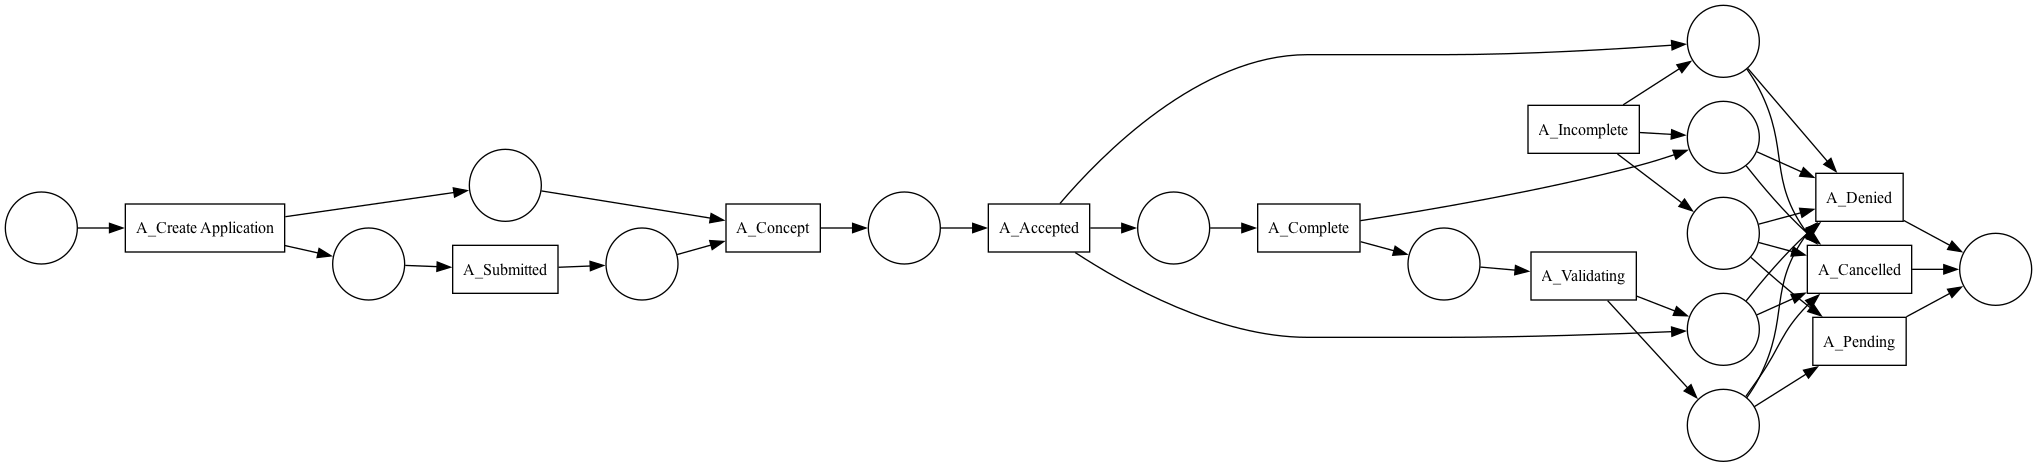

In [13]:
# alpha miner - net (places and transactions)
# general way to visualize net or tree or graph in pm4py - pm4py.view_{petri_net/tree/...}
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(event_log)
pm4py.view_petri_net(net)

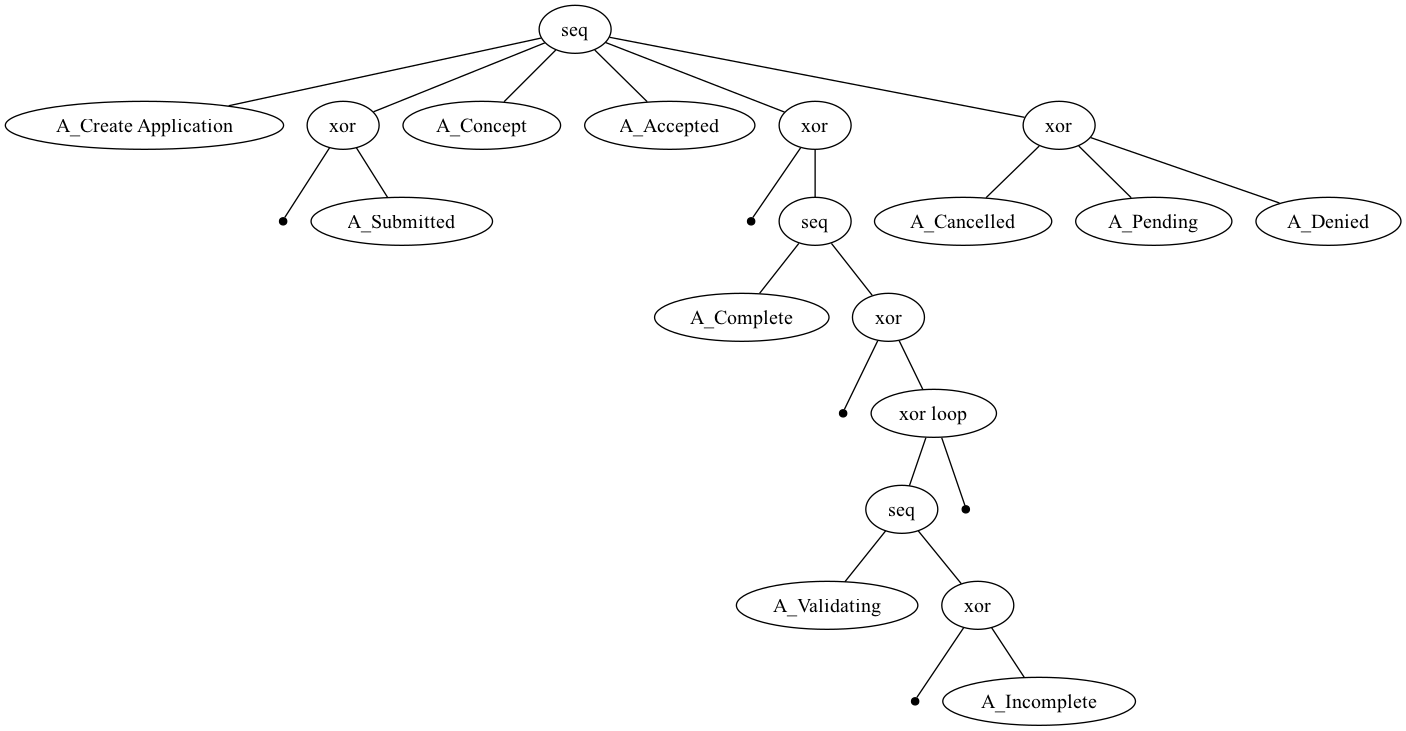

In [14]:
# inductive miner algoritham, we can plot perocess tree, and can save the net same as alpha miner ((places and transactions))
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
tree = pm4py.discover_process_tree_inductive(event_log)
pm4py.view_process_tree(tree)

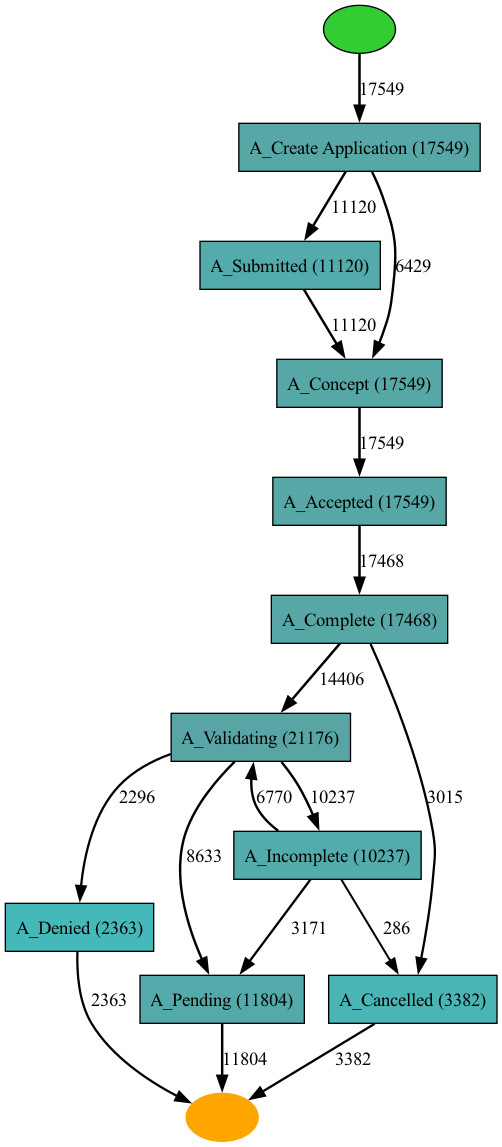

In [15]:
# huristic miner
heu_net = pm4py.discover_heuristics_net(event_log, dependency_threshold=0.90)
pm4py.view_heuristics_net(heu_net)

# Data Preporcessing: traces

In [16]:
# check type and correct if needed
df.dtypes

Action                   object
EventID                  object
EventOrigin              object
org:resource             object
concept:name             object
lifecycle:transition     object
time:timestamp           object
case:LoanGoal            object
case:concept:name        object
case:RequestedAmount    float64
case:ApplicationType     object
dtype: object

In [17]:
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'], utc=True)
df['Year'] = df['time:timestamp'].dt.year
df['Month'] = df['time:timestamp'].dt.month

In [18]:
df.head(5)

,Action,EventID,EventOrigin,org:resource,concept:name,lifecycle:transition,time:timestamp,case:LoanGoal,case:concept:name,case:RequestedAmount,case:ApplicationType,Year,Month
0,Created,Application_652823628,Application,User_1,A_Create Application,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,Application_652823628,20000.0,New credit,2016,1
1,statechange,ApplState_1582051990,Application,User_1,A_Submitted,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,Application_652823628,20000.0,New credit,2016,1
2,statechange,ApplState_642383566,Application,User_1,A_Concept,complete,2016-01-01 09:52:36.413000+00:00,Existing loan takeover,Application_652823628,20000.0,New credit,2016,1
3,statechange,ApplState_99568828,Application,User_52,A_Accepted,complete,2016-01-02 11:23:04.299000+00:00,Existing loan takeover,Application_652823628,20000.0,New credit,2016,1
4,statechange,ApplState_946455804,Application,User_52,A_Complete,complete,2016-01-02 11:30:28.633000+00:00,Existing loan takeover,Application_652823628,20000.0,New credit,2016,1


In [34]:
case_attr_df = df.groupby('case:concept:name').agg({
    'case:LoanGoal': 'first',
    'case:RequestedAmount': 'first',
    'case:ApplicationType': 'first',
    'Month': 'first',
    'Year': 'first'
}).reset_index()

In [35]:
case_attr_df.head(5)

,case:concept:name,case:LoanGoal,case:RequestedAmount,case:ApplicationType,Month,Year
0,Application_1000158214,Home improvement,12500.0,New credit,6,2016
1,Application_1000334415,"Other, see explanation",5000.0,New credit,9,2016
2,Application_100034150,Existing loan takeover,5000.0,New credit,2,2016
3,Application_1000386745,Car,5000.0,New credit,11,2016
4,Application_1000474975,"Other, see explanation",50000.0,New credit,6,2016


# Visualaization of the traces

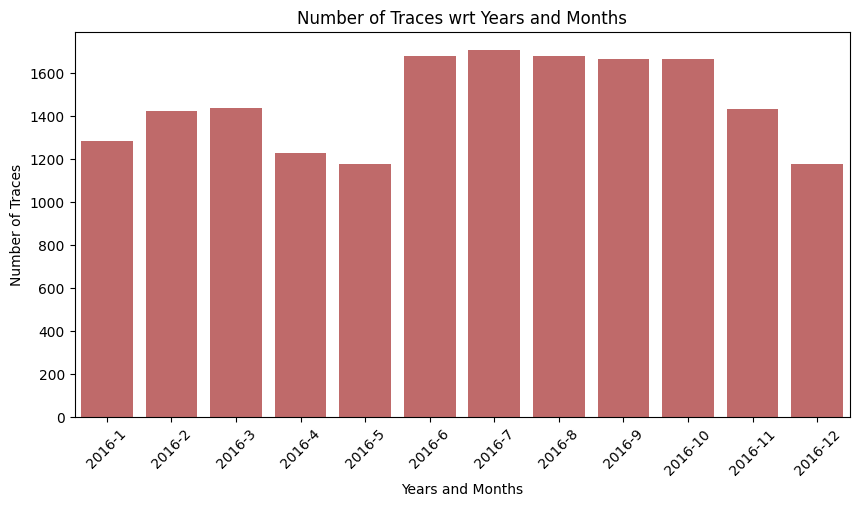

In [42]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

# Assuming 'Year' and 'Month' are separate columns in your DataFrame
# If not, modify the columns accordingly
temp = case_attr_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Combine 'Year' and 'Month' into a single label
temp['YearMonth'] = temp['Year'].astype(str) + '-' + temp['Month'].astype(str)

grid = sns.barplot(x='YearMonth', y='Count', data=temp, color='indianred')

ax.set_xlabel("Years and Months")  # set x-axis label
ax.set_ylabel("Number of Traces")  # set y-axis label
plt.title('Number of Traces wrt Years and Months')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


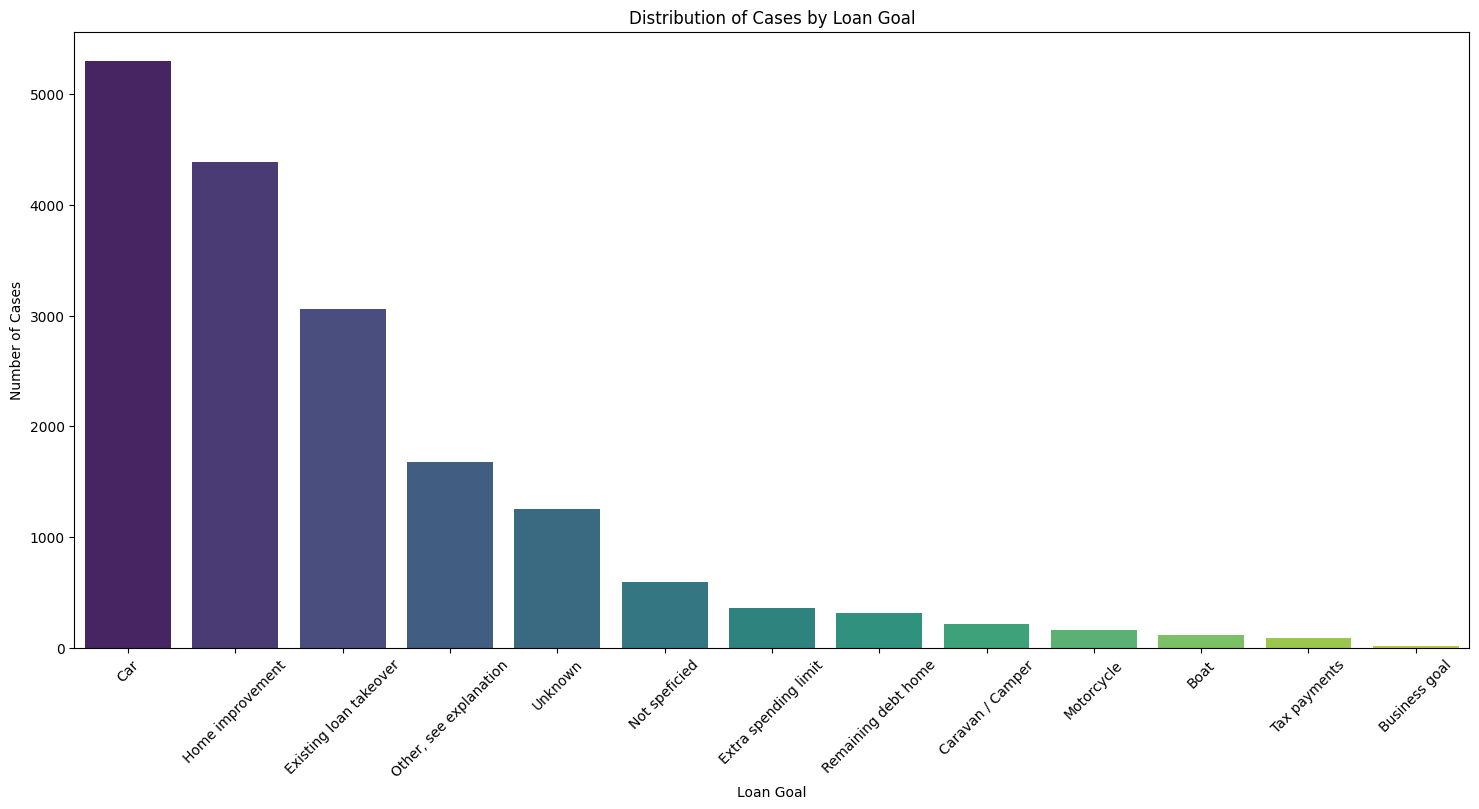

In [30]:
# Assuming your DataFrame is named case_attr_df
plt.figure(figsize=(18, 8))
sns.countplot(x='case:LoanGoal', data=case_attr_df, palette='viridis', order=case_attr_df['case:LoanGoal'].value_counts().index)
plt.xlabel('Loan Goal')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Loan Goal')
plt.xticks(rotation=45)
plt.show()

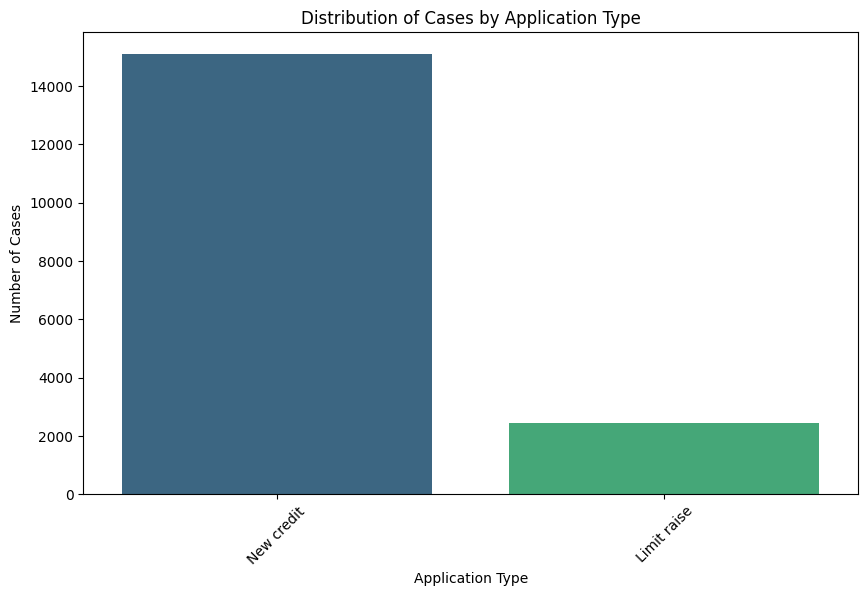

In [33]:
# Assuming your DataFrame is named case_attr_df
plt.figure(figsize=(10, 6))
sns.countplot(x='case:ApplicationType', data=case_attr_df, palette='viridis', order=case_attr_df['case:ApplicationType'].value_counts().index)
plt.xlabel('Application Type')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Application Type')
plt.xticks(rotation=45)
plt.show()